<a href="https://colab.research.google.com/github/Ubaldo-Yareli/M-todos-numericos/blob/main/Coeficientes_binomiales_con_valores_no_enteros.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import matplotlib.pyplot as plt

Dada una tabla de datos con dos colúmnas (inicialmente), donde la primera colúmna contiene los valores de $x$ y en la otra los datos $(y=F(x))$ de evaluar dichos puntos en la función.

In [3]:
#Datos de la tabla
X=np.array([0, 1, 2, 3, 4, 5]) #Valores de "x"
F=np.array([-5, 1, 9, 25, 55, 105]) #Valores de y=F(x)


In [4]:
#Nos dice de qué tipo es, en este caso, array
F

array([ -5,   1,   9,  25,  55, 105])

Se crea una gráfica con los valores de la tabla mencionada anteriormente, donde el eje de las abscisas corresponde a los valores de $"x"$ y el ejer de las ordenadas a los valores de $"y=F(x)"$

<function matplotlib.pyplot.show(close=None, block=None)>

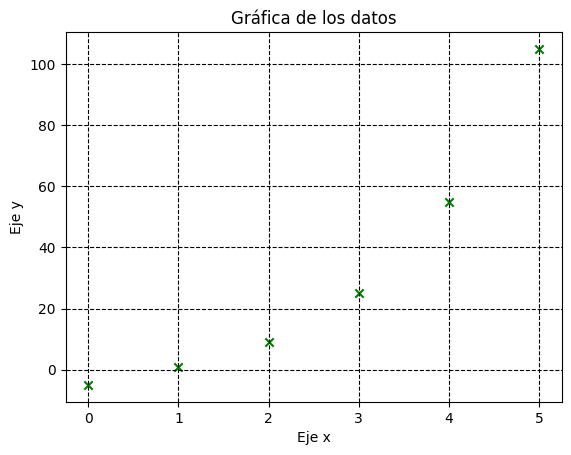

In [17]:
#Graficar los datos originales de la tabla
plt.scatter(X,F, color="green", marker='x')
plt.title("Gráfica de los datos") #Título de la gráfica
plt.xlabel("Eje x") #Etiqueta del eje "x"
plt.ylabel("Eje y") #Etiqueta del eje "y"
plt.grid(color="black", linestyle="--")
plt.show

Se define el polinomio con el que se estará trabajando y posteriormente se crea la gráfica de dicho polinomio, donde también se incluyen los valores de la tabla.

In [6]:
def f(x):
  return x**3-2*x**2+7*x-5

x1=np.linspace(0, 5, 100)

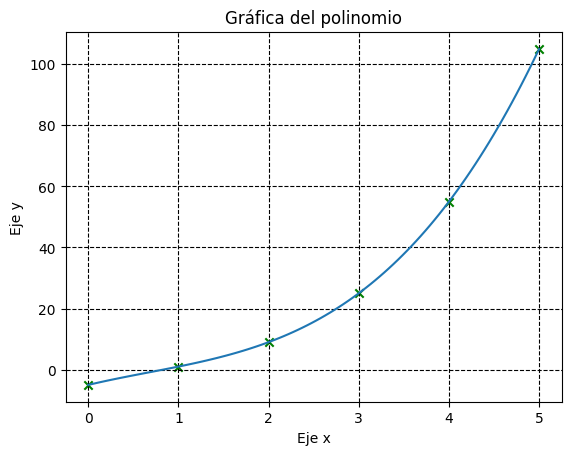

In [18]:
#Gráfica del polinomio
plt.plot (x1, f(x1))
plt.scatter(X,F, color="green", marker='x')
plt.title("Gráfica del polinomio")
plt.xlabel("Eje x")
plt.ylabel("Eje y")
plt.grid(color="black", linestyle="--")
plt.show()

In [8]:
#Construcción del algoritmo
#Tabla de primeras diferencias
dif=F[1]-F[0]
print(dif)

6


Al tener la tabla inicial con dos colúmnas, se crea un tercera que se denomina $Δy$ o $Δ^1y$ la cual, es hecha con las diferencias que existen entre los valores de la colúmna $y=F(x)$.

In [9]:
#Primeras diferencias
delta1=np.array([])
for i in range (len(F)-1):
  dif=F[i+1]-F[i]
  print(dif)
  delta1=np.append(delta1, dif)
print(delta1)

6
8
16
30
50
[ 6.  8. 16. 30. 50.]


Posteiormente se encuentra $Δ^2y$, son las diferencias entre los valores de $Δ^1y$

In [10]:
#Segundas diferencias
delta2=np.array([])
for i in range (len(delta1)-1):
  dif=delta1[i+1]-delta1[i]
  print(dif)
  delta2=np.append(delta2, dif)
print(delta2)

2.0
8.0
14.0
20.0
[ 2.  8. 14. 20.]


Se reallizan los mismos pasos hasta que las diferencias sean iguales, en este caso, en $Δ^3y$ se tienen todas las diferencias con el número 6, por lo que se concluye que el polinomio es de grado $3$.

In [11]:
#Terceras diferencias
delta3=np.array([])
for i in range (len(delta2)-1):
  dif=delta2[i+1]-delta2[i]
  print(dif)
  delta3=np.append(delta3, dif)
print(delta3)

6.0
6.0
6.0
[6. 6. 6.]


$Δ^4y$ es una comprobación, donde las diferencias (en este ejemplo) ya son $0$.

In [12]:
#Cuartas diferencias
delta4=np.array([])
for i in range (len(delta3)-1):
  dif=delta3[i+1]-delta3[i]
  print(dif)
  delta4=np.append(delta4, dif)
print(delta4)


0.0
0.0
[0. 0.]


Se calculan los coeficientes binomiales, donde se necesitan los valores de:
$h=$Distancia e los valores de la colúmna $x$ de la tabla.

$Xk=$El valor del que se quiere encontrar $y=F(x)$

$X0=$El valor menor más cercano a $xk$

Con dichos valores, se puede encontrar el valor de $K$, con la fórmula $K=\frac{(Xk-X0)}{h}$, valor que se utilizará para encontrar los coeficientes binomiales.

Los coeficientes binomiales se encuentran con $\binom{k}{j}=\frac{(k)(k-1)(k-2)...(k-(j+1))}{j!}$, con $j$ iniciando en 1.

In [16]:
#Cálculo de coeficientes binomiales
import scipy.special as sp

#Diferencias calculadas anteriormente
delta1 = np.diff(F)
delta2 = np.diff(delta1)
delta3 = np.diff(delta2)
delta4 = np.diff(delta3)

xk=1.5  #El punto donde se evaluará la función
x0=X[0]

#Calcular los valores de h y k
h=X[1]-X[0]  #Si los puntos tienen diferencias constantes
k=(xk-x0)/h

# Cálculo de f(xk)
f_xk=F[0] #Primer término f(x0)
term=1

#Iteración para sumar los términos
for n in range(1, len(F)):
    term*=(k-(n-1))
    coef_binomial = term / sp.factorial(n)  #El factorial de n

    if n==1:
        f_xk+=coef_binomial*delta1[0]
    elif n==2:
        f_xk+=coef_binomial*delta2[0]
    elif n==3:
        f_xk+=coef_binomial*delta3[0]
    elif n==4:
        f_xk += coef_binomial * delta4[0]

#Imprime el resultado
print(f"El valor de f({xk}) es: {f_xk}")

El valor de f(1.5) es aproximadamente: 4.375
